In [44]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [83]:
train=pd.read_csv(r"dacon_train.csv")
test=pd.read_csv(r"dacon_test.csv")
submission=pd.read_csv('open data/sample_submission.csv', index_col=0)  

In [84]:
train['religion_other'] = list(map(lambda x: 1 if str(x)== 'Other' else 0, train['religion']) )
test['religion_other'] = list(map(lambda x: 1 if str(x)== 'Other' else 0, test['religion']) )

train['age_10s'] = list(map(lambda x: 1 if str(x)== '10s' else 0, train['age_group']) )
test['age_10s'] = list(map(lambda x: 1 if str(x)== '10s' else 0, test['age_group']) )

train['married_currently married'] = list(map(lambda x: 1 if str(x)== '2' else 0, train['married']) )
test['married_currently married'] = list(map(lambda x: 1 if str(x)== '2' else 0, test['married']) )

train['education_less than high school'] = list(map(lambda x: 1 if str(x)== '1' else 0, train['education']) )
test['education_less than high school'] = list(map(lambda x: 1 if str(x)== '1' else 0, test['education']) )

train['education_university degree'] = list(map(lambda x: 1 if str(x)== '3' else 0, train['education']) )
test['education_university degree'] = list(map(lambda x: 1 if str(x)== '3' else 0, test['education']) )

In [85]:
train['Machiavelli up'] = list(map(lambda x: 1 if x>= 60 else 0, train['Machiavelli Score']) )
test['Machiavelli up'] = list(map(lambda x: 1 if x>= 60 else 0, test['Machiavelli Score']) )

train['gold'] = train['urban'] + train['education']
test['gold'] = test['urban'] + test['education']

In [86]:
train['race_white'] = list(map(lambda x: 1 if str(x)== 'White' else 0, train['race']) )

train['Christian_Mormon'] = list(map(lambda x: 1 if str(x)== 'Christian_Mormon' else 0, train['religion']) )
train['Christian_Catholic'] = list(map(lambda x: 1 if str(x)== 'Christian_Catholic' else 0, train['religion']) )
train['Christian_Protestant'] = list(map(lambda x: 1 if str(x)== 'Christian_Protestant' else 0, train['religion']) )

train['age_50s'] = list(map(lambda x: 1 if str(x)== '50s' else 0, train['age_group']) )
train['age_60s'] = list(map(lambda x: 1 if str(x)== '60s' else 0, train['age_group']) )
train['age_70s'] = list(map(lambda x: 1 if str(x)== '+70s' else 0, train['age_group']) )

train['Male'] = list(map(lambda x: 1 if str(x)== 'Male' else 0, train['gender']) )

train['soil'] = 7 - train['gold']

train['Republican'] = train['race_white']+train['Christian_Mormon']+train['Christian_Catholic']+train['Christian_Protestant']+train['age_50s']+train['age_60s']+train['age_70s']+train['soil']+train['Male']

In [87]:
test['race_white'] = list(map(lambda x: 1 if str(x)== 'White' else 0, test['race']) )

test['Christian_Mormon'] = list(map(lambda x: 1 if str(x)== 'Christian_Mormon' else 0, test['religion']) )
test['Christian_Catholic'] = list(map(lambda x: 1 if str(x)== 'Christian_Catholic' else 0, test['religion']) )
test['Christian_Protestant'] = list(map(lambda x: 1 if str(x)== 'Christian_Protestant' else 0, test['religion']) )

test['age_50s'] = list(map(lambda x: 1 if str(x)== '50s' else 0, test['age_group']) )
test['age_60s'] = list(map(lambda x: 1 if str(x)== '60s' else 0, test['age_group']) )
test['age_70s'] = list(map(lambda x: 1 if str(x)== '+70s' else 0, test['age_group']) )

test['Male'] = list(map(lambda x: 1 if str(x)== 'Male' else 0, test['gender']) )

test['soil'] = 7 - test['gold']

test['Republican'] = test['race_white']+test['Christian_Mormon']+test['Christian_Catholic']+test['Christian_Protestant']+test['age_50s']+test['age_60s']+test['age_70s']+test['soil']+test['Male']

In [88]:
train['race_Asian'] = list(map(lambda x: 1 if str(x)== 'Asian' else 0, train['race']) )
train['race_Black'] = list(map(lambda x: 1 if str(x)== 'Black' else 0, train['race']) )
train['race_Native_American'] = list(map(lambda x: 1 if str(x)== 'Native American' else 0, train['race']) )
train['race_Indigenous_Australian'] = list(map(lambda x: 1 if str(x)== 'Indigenous Australian' else 0, train['race']) )
train['race_Other'] = list(map(lambda x: 1 if str(x)== 'Other' else 0, train['race']) )

train['Jewish'] = list(map(lambda x: 1 if str(x)== 'Jewish' else 0, train['religion']) )
train['Christian_Catholic'] = list(map(lambda x: 1 if str(x)== 'Christian_Catholic' else 0, train['religion']) )
train['Christian_Protestant'] = list(map(lambda x: 1 if str(x)== 'Christian_Protestant' else 0, train['religion']) )

train['age_20s'] = list(map(lambda x: 1 if str(x)== '20s' else 0, train['age_group']) )
train['age_30s'] = list(map(lambda x: 1 if str(x)== '30s' else 0, train['age_group']) )

train['Female'] = list(map(lambda x: 1 if str(x)== 'Female' else 0, train['gender']) )

train['Democratic'] = train['Female']+train['age_30s']+train['age_20s']+train['Christian_Protestant']+train['Christian_Catholic']+train['Jewish']+train['race_Asian']+train['race_Black']+train['race_Native_American']+train['race_Indigenous_Australian']+train['race_Other']

In [89]:
test['race_Asian'] = list(map(lambda x: 1 if str(x)== 'Asian' else 0, test['race']) )
test['race_Black'] = list(map(lambda x: 1 if str(x)== 'Black' else 0, test['race']) )
test['race_Native_American'] = list(map(lambda x: 1 if str(x)== 'Native American' else 0, test['race']) )
test['race_Indigenous_Australian'] = list(map(lambda x: 1 if str(x)== 'Indigenous Australian' else 0, test['race']) )
test['race_Other'] = list(map(lambda x: 1 if str(x)== 'Other' else 0, test['race']) )

test['Jewish'] = list(map(lambda x: 1 if str(x)== 'Jewish' else 0, test['religion']) )
test['Christian_Catholic'] = list(map(lambda x: 1 if str(x)== 'Christian_Catholic' else 0, test['religion']) )
test['Christian_Protestant'] = list(map(lambda x: 1 if str(x)== 'Christian_Protestant' else 0, test['religion']) )

test['age_20s'] = list(map(lambda x: 1 if str(x)== '20s' else 0, test['age_group']) )
test['age_30s'] = list(map(lambda x: 1 if str(x)== '30s' else 0, test['age_group']) )

test['Female'] = list(map(lambda x: 1 if str(x)== 'Female' else 0, test['gender']) )

test['Democratic'] = test['Female']+test['age_30s']+test['age_20s']+test['Christian_Protestant']+test['Christian_Catholic']+test['Jewish']+test['race_Asian']+test['race_Black']+test['race_Native_American']+test['race_Indigenous_Australian']+test['race_Other']

In [90]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(train['age_group'])
labels=encoder.transform(train['age_group'])
labels=pd.DataFrame(labels)
train['age_group']=labels+1

labels=encoder.transform(test['age_group'])
labels=pd.DataFrame(labels)
test['age_group']=labels+1

encoder.fit(train['gender'])
labels=encoder.transform(train['gender'])
labels=pd.DataFrame(labels)
train['gender']=labels+1

labels=encoder.transform(test['gender'])
labels=pd.DataFrame(labels)
test['gender']=labels+1

encoder.fit(train['race'])
labels=encoder.transform(train['race'])
labels=pd.DataFrame(labels)
train['race']=labels+1

labels=encoder.transform(test['race'])
labels=pd.DataFrame(labels)
test['race']=labels+1

encoder.fit(train['religion'])
labels=encoder.transform(train['religion'])
labels=pd.DataFrame(labels)
train['religion']=labels+1

labels=encoder.transform(test['religion'])
labels=pd.DataFrame(labels)
test['religion']=labels+1

In [91]:
#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, train_test_split

#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [92]:
y = train['voted']
X = train.drop('voted',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [95]:
lgbm_wrapper_time=LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=500, random_state=1)
#LGBMClassifier(learning_rate=0.01, max_depth=8, n_estimators=300, random_state=1)
evals=[(X_test,y_test)]
model1 = lgbm_wrapper_time.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
lgbm_wrapper_time_preds=lgbm_wrapper_time.predict(X_test)
lgbm_time_roc_auc = roc_auc_score(lgbm_wrapper_time_preds,y_test )
print('LightGBM 최적 파라미터 roc_auc 예측 점수:',lgbm_time_roc_auc)

[1]	valid_0's binary_logloss: 0.687198
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.685035
[3]	valid_0's binary_logloss: 0.682914
[4]	valid_0's binary_logloss: 0.680833
[5]	valid_0's binary_logloss: 0.678792
[6]	valid_0's binary_logloss: 0.676785
[7]	valid_0's binary_logloss: 0.674823
[8]	valid_0's binary_logloss: 0.672887
[9]	valid_0's binary_logloss: 0.670995
[10]	valid_0's binary_logloss: 0.669136
[11]	valid_0's binary_logloss: 0.667319
[12]	valid_0's binary_logloss: 0.66553
[13]	valid_0's binary_logloss: 0.663768
[14]	valid_0's binary_logloss: 0.662048
[15]	valid_0's binary_logloss: 0.660359
[16]	valid_0's binary_logloss: 0.658692
[17]	valid_0's binary_logloss: 0.657064
[18]	valid_0's binary_logloss: 0.65545
[19]	valid_0's binary_logloss: 0.653889
[20]	valid_0's binary_logloss: 0.652336
[21]	valid_0's binary_logloss: 0.650817
[22]	valid_0's binary_logloss: 0.649318
[23]	valid_0's binary_logloss: 0.647855
[24]	valid_0's binary_logloss

[205]	valid_0's binary_logloss: 0.562708
[206]	valid_0's binary_logloss: 0.562603
[207]	valid_0's binary_logloss: 0.562506
[208]	valid_0's binary_logloss: 0.562418
[209]	valid_0's binary_logloss: 0.562314
[210]	valid_0's binary_logloss: 0.56222
[211]	valid_0's binary_logloss: 0.562109
[212]	valid_0's binary_logloss: 0.562022
[213]	valid_0's binary_logloss: 0.561912
[214]	valid_0's binary_logloss: 0.561837
[215]	valid_0's binary_logloss: 0.561735
[216]	valid_0's binary_logloss: 0.561651
[217]	valid_0's binary_logloss: 0.561557
[218]	valid_0's binary_logloss: 0.561487
[219]	valid_0's binary_logloss: 0.561388
[220]	valid_0's binary_logloss: 0.561307
[221]	valid_0's binary_logloss: 0.561215
[222]	valid_0's binary_logloss: 0.56113
[223]	valid_0's binary_logloss: 0.561037
[224]	valid_0's binary_logloss: 0.560958
[225]	valid_0's binary_logloss: 0.560874
[226]	valid_0's binary_logloss: 0.560816
[227]	valid_0's binary_logloss: 0.560747
[228]	valid_0's binary_logloss: 0.560671
[229]	valid_0's bi

[408]	valid_0's binary_logloss: 0.555933
[409]	valid_0's binary_logloss: 0.555927
[410]	valid_0's binary_logloss: 0.555933
[411]	valid_0's binary_logloss: 0.555942
[412]	valid_0's binary_logloss: 0.555935
[413]	valid_0's binary_logloss: 0.555922
[414]	valid_0's binary_logloss: 0.555923
[415]	valid_0's binary_logloss: 0.55591
[416]	valid_0's binary_logloss: 0.555902
[417]	valid_0's binary_logloss: 0.555894
[418]	valid_0's binary_logloss: 0.55589
[419]	valid_0's binary_logloss: 0.55589
[420]	valid_0's binary_logloss: 0.555893
[421]	valid_0's binary_logloss: 0.555874
[422]	valid_0's binary_logloss: 0.55588
[423]	valid_0's binary_logloss: 0.555885
[424]	valid_0's binary_logloss: 0.55589
[425]	valid_0's binary_logloss: 0.555897
[426]	valid_0's binary_logloss: 0.555902
[427]	valid_0's binary_logloss: 0.555905
[428]	valid_0's binary_logloss: 0.55591
[429]	valid_0's binary_logloss: 0.555905
[430]	valid_0's binary_logloss: 0.5559
[431]	valid_0's binary_logloss: 0.555897
[432]	valid_0's binary_l

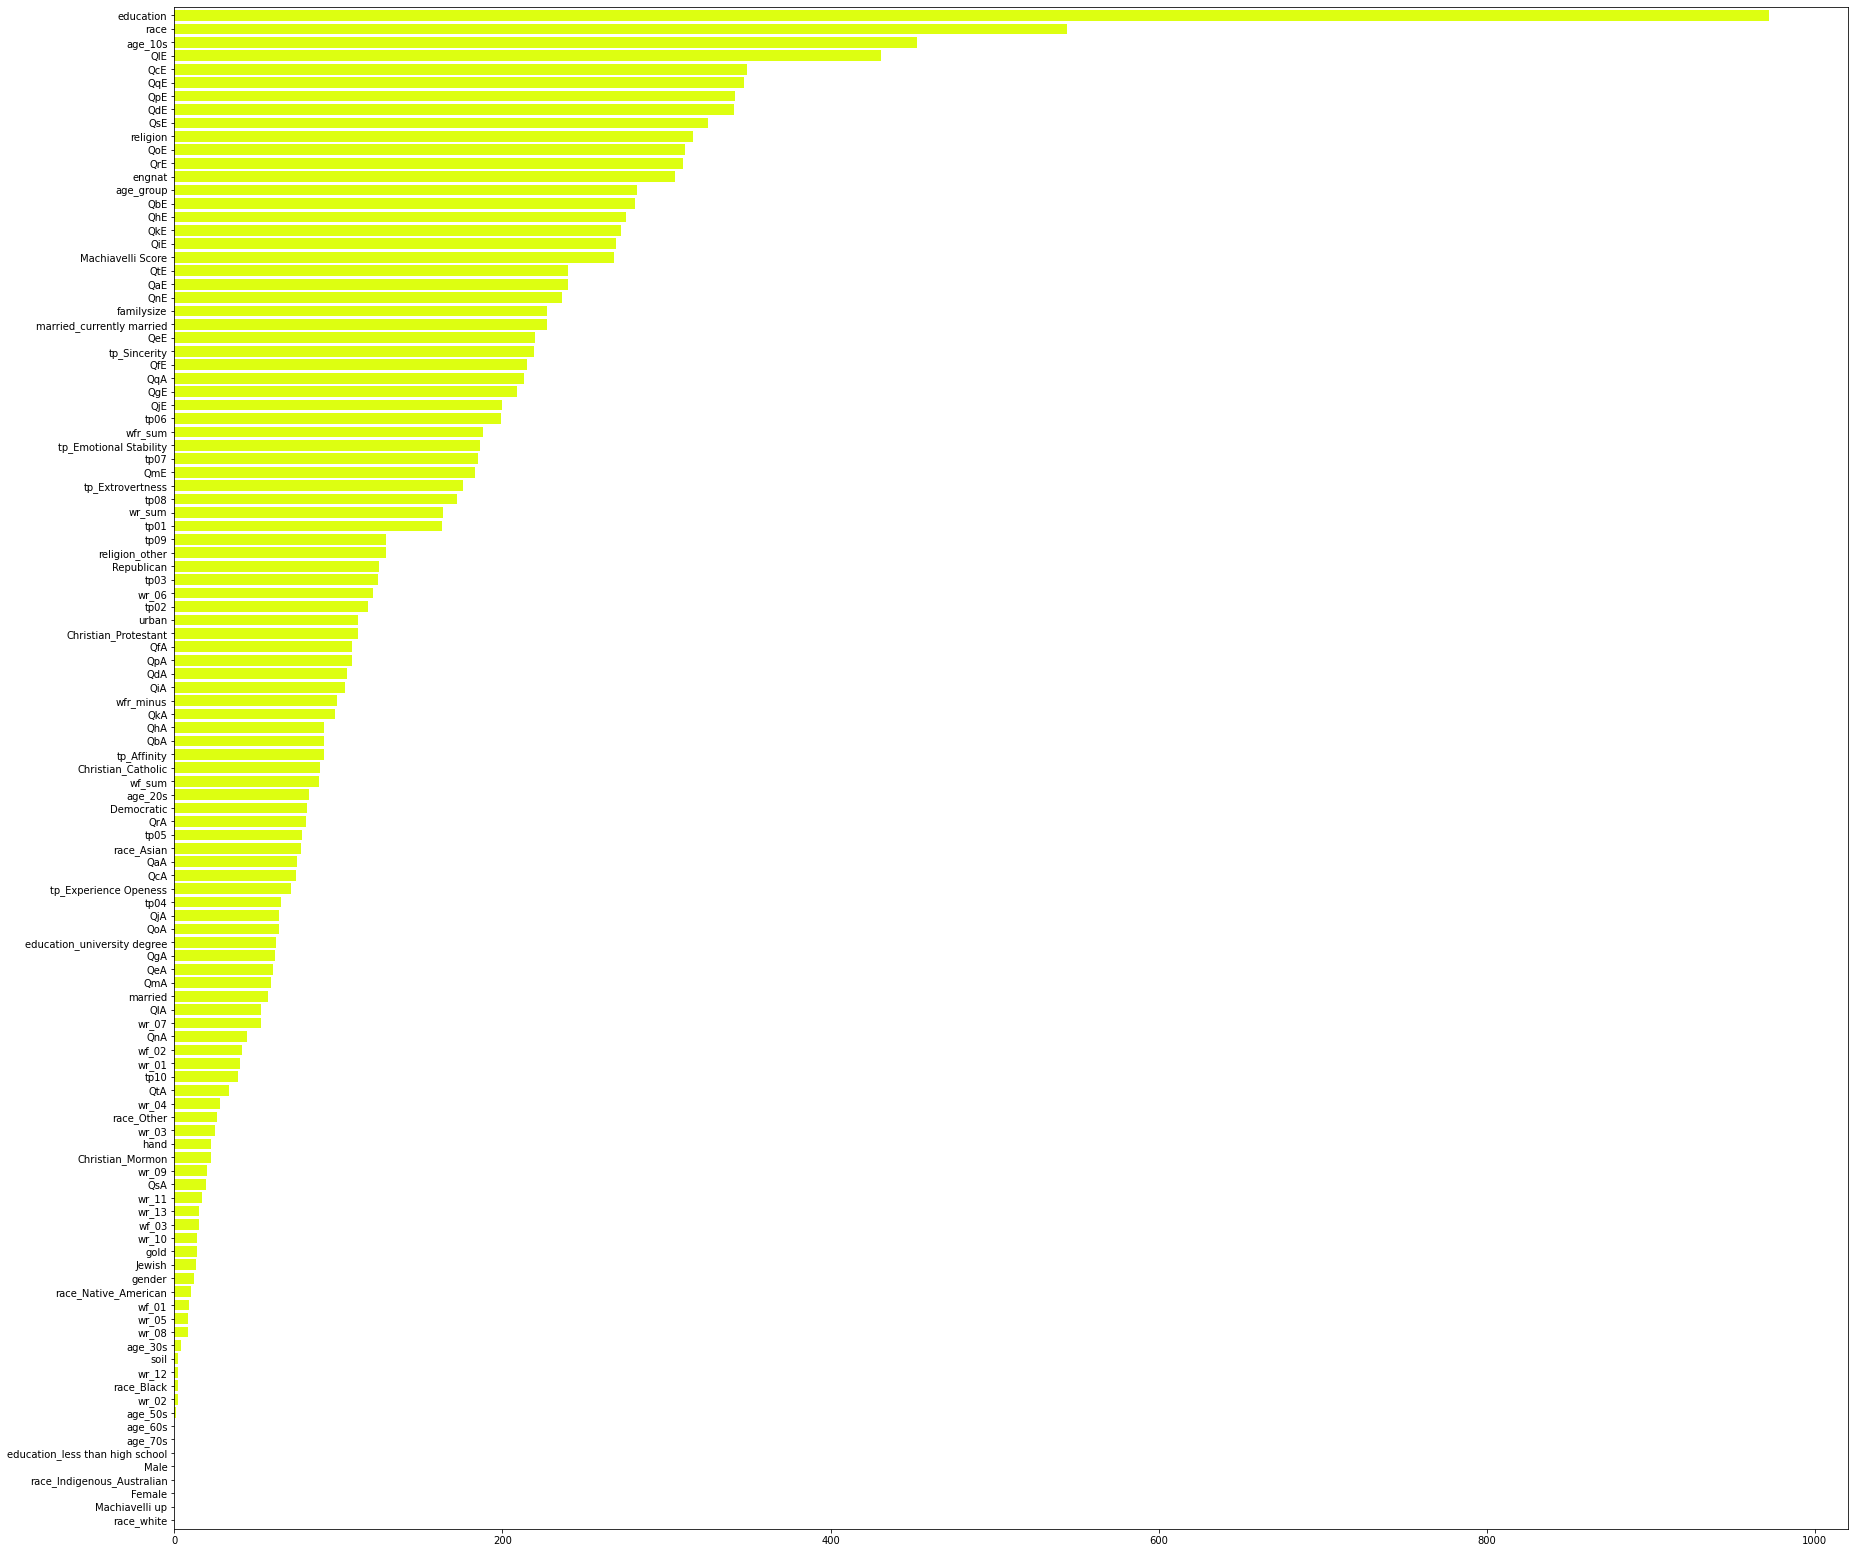

In [96]:
pd.Series(lgbm_wrapper_time.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(30,28) # fig그림 크기 조절
plt.show()

In [97]:
evals = [(X, y)]

lgbm_wrapper = LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=500, random_state=1)
lgbm_wrapper.fit(X, y, eval_set=evals, eval_metric='logloss', verbose=True)

[1]	training's binary_logloss: 0.686545
[2]	training's binary_logloss: 0.684376
[3]	training's binary_logloss: 0.682249
[4]	training's binary_logloss: 0.680166
[5]	training's binary_logloss: 0.678119
[6]	training's binary_logloss: 0.67611
[7]	training's binary_logloss: 0.67414
[8]	training's binary_logloss: 0.672205
[9]	training's binary_logloss: 0.670307
[10]	training's binary_logloss: 0.668444
[11]	training's binary_logloss: 0.666615
[12]	training's binary_logloss: 0.664804
[13]	training's binary_logloss: 0.663043
[14]	training's binary_logloss: 0.661299
[15]	training's binary_logloss: 0.659599
[16]	training's binary_logloss: 0.657916
[17]	training's binary_logloss: 0.656261
[18]	training's binary_logloss: 0.654652
[19]	training's binary_logloss: 0.653056
[20]	training's binary_logloss: 0.651486
[21]	training's binary_logloss: 0.649959
[22]	training's binary_logloss: 0.648446
[23]	training's binary_logloss: 0.64696
[24]	training's binary_logloss: 0.645508
[25]	training's binary_loglo

[207]	training's binary_logloss: 0.554093
[208]	training's binary_logloss: 0.553947
[209]	training's binary_logloss: 0.553794
[210]	training's binary_logloss: 0.553644
[211]	training's binary_logloss: 0.553507
[212]	training's binary_logloss: 0.55336
[213]	training's binary_logloss: 0.553217
[214]	training's binary_logloss: 0.553069
[215]	training's binary_logloss: 0.552927
[216]	training's binary_logloss: 0.552794
[217]	training's binary_logloss: 0.55265
[218]	training's binary_logloss: 0.552514
[219]	training's binary_logloss: 0.552376
[220]	training's binary_logloss: 0.552241
[221]	training's binary_logloss: 0.552106
[222]	training's binary_logloss: 0.551973
[223]	training's binary_logloss: 0.55184
[224]	training's binary_logloss: 0.551717
[225]	training's binary_logloss: 0.551587
[226]	training's binary_logloss: 0.551458
[227]	training's binary_logloss: 0.551332
[228]	training's binary_logloss: 0.551206
[229]	training's binary_logloss: 0.551082
[230]	training's binary_logloss: 0.55

[407]	training's binary_logloss: 0.535972
[408]	training's binary_logloss: 0.535883
[409]	training's binary_logloss: 0.53582
[410]	training's binary_logloss: 0.53575
[411]	training's binary_logloss: 0.53568
[412]	training's binary_logloss: 0.535614
[413]	training's binary_logloss: 0.535548
[414]	training's binary_logloss: 0.535483
[415]	training's binary_logloss: 0.535414
[416]	training's binary_logloss: 0.535354
[417]	training's binary_logloss: 0.535267
[418]	training's binary_logloss: 0.535203
[419]	training's binary_logloss: 0.535134
[420]	training's binary_logloss: 0.53507
[421]	training's binary_logloss: 0.535002
[422]	training's binary_logloss: 0.534932
[423]	training's binary_logloss: 0.534872
[424]	training's binary_logloss: 0.534804
[425]	training's binary_logloss: 0.53474
[426]	training's binary_logloss: 0.534665
[427]	training's binary_logloss: 0.534599
[428]	training's binary_logloss: 0.534539
[429]	training's binary_logloss: 0.534475
[430]	training's binary_logloss: 0.5343

LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=500,
               random_state=1)

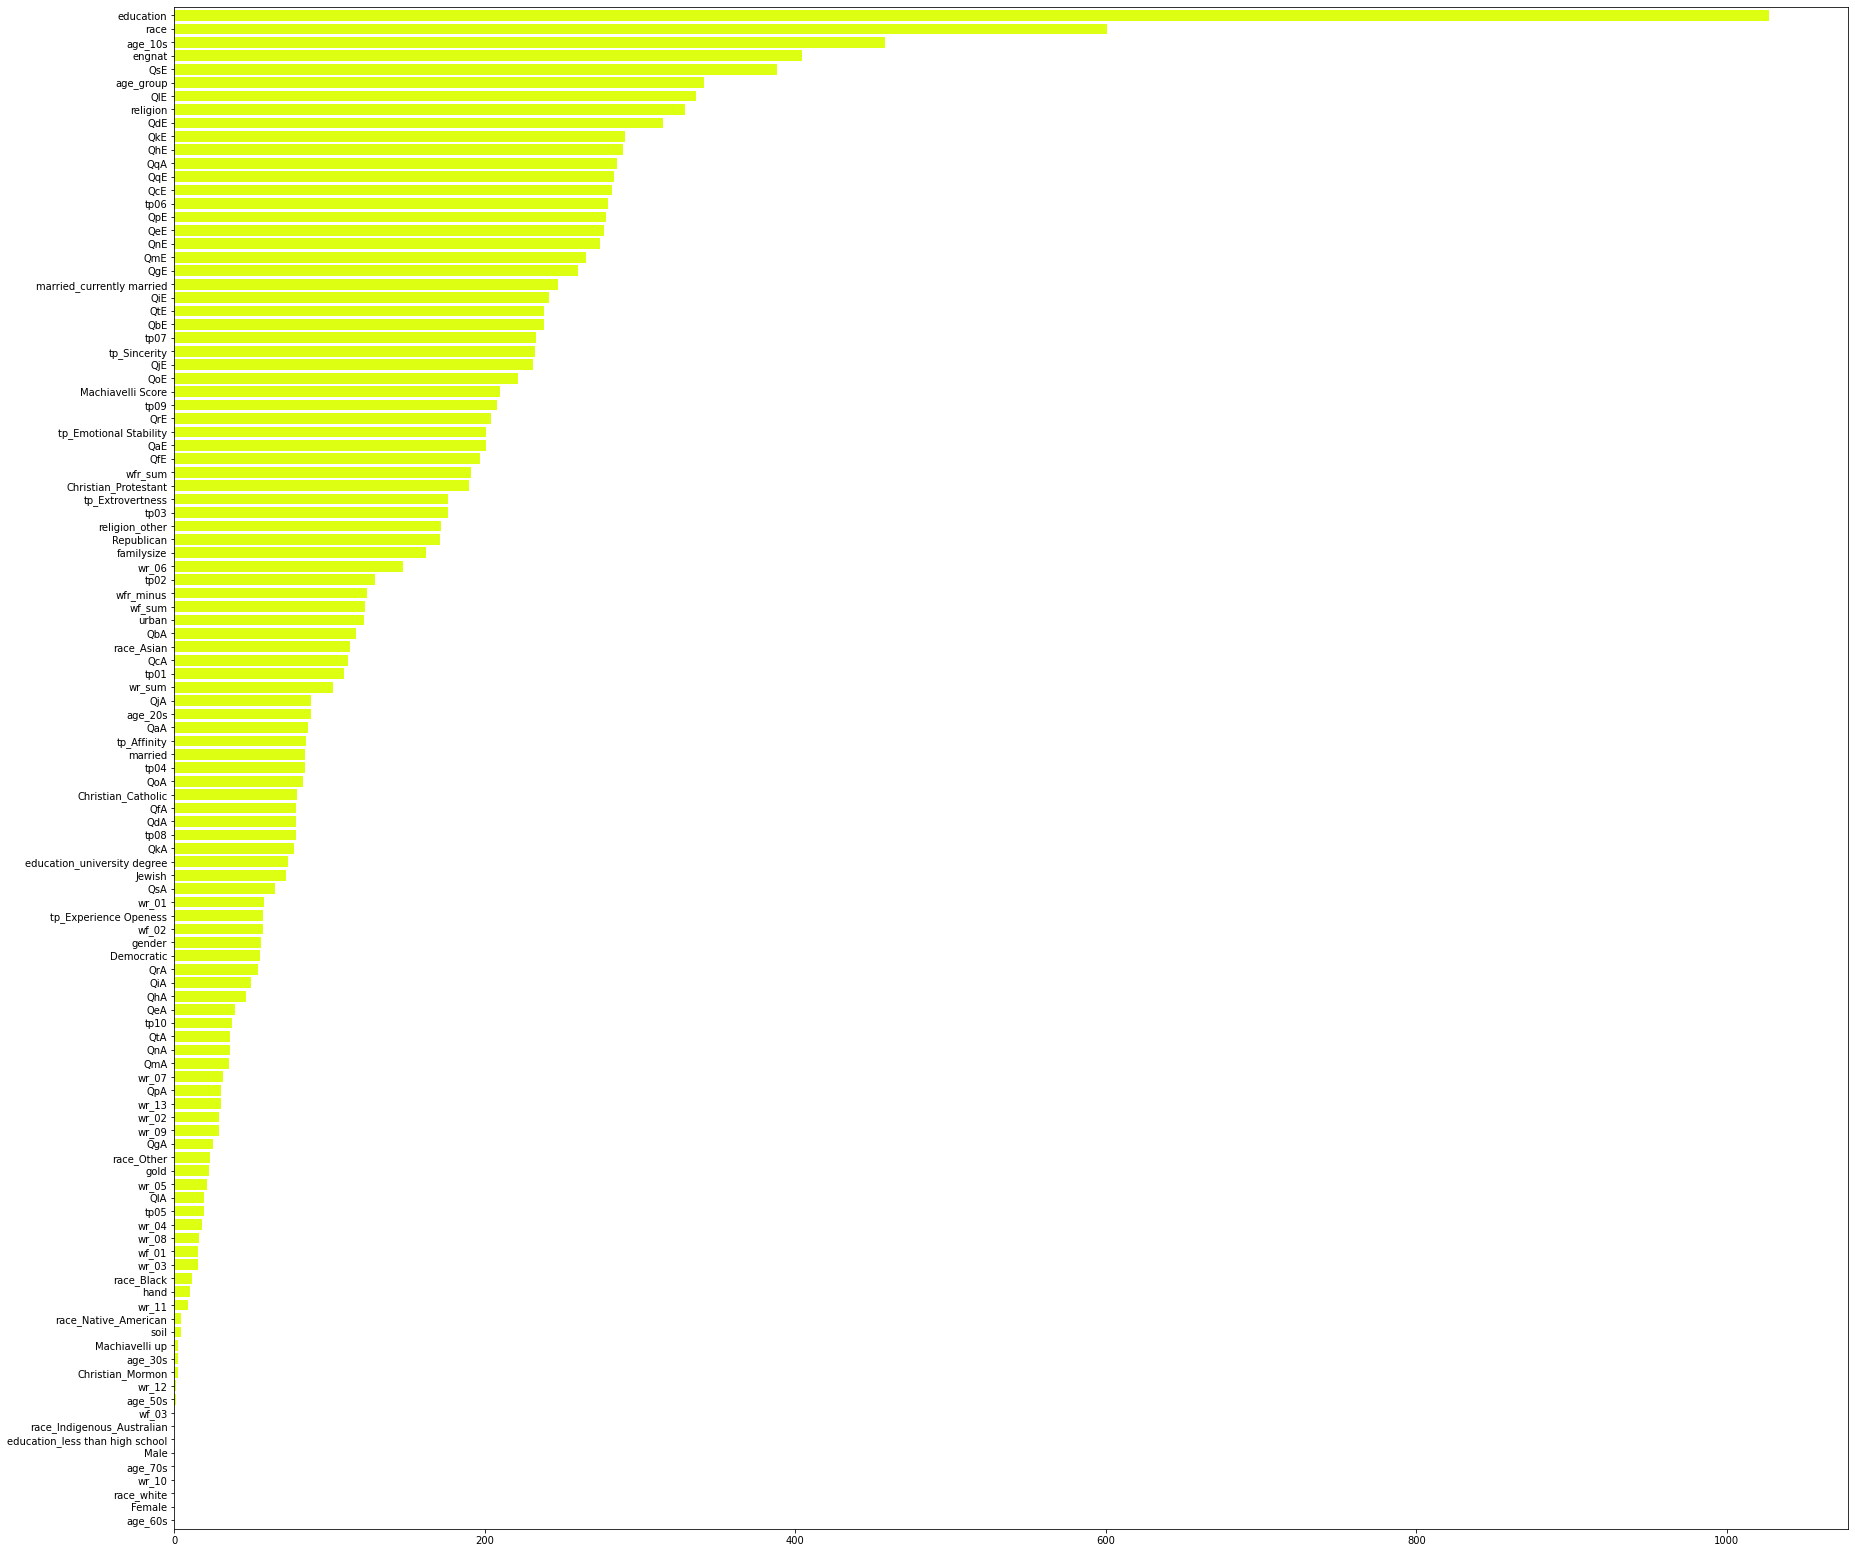

In [98]:
pd.Series(lgbm_wrapper.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(30,28) # fig그림 크기 조절
plt.show()

In [ ]:
LGBM=pd.DataFrame(lgbm_wrapper.predict_proba(test))
LGBM['Probability']=LGBM[1]

In [ ]:
submission['voted'] = LGBM['Probability']
submission.to_csv('submission_proba1110.csv', index = False)

In [99]:
pd.Series(lgbm_wrapper.feature_importances_,X.columns).sort_values(ascending=False)[:50]

education                    1027
race                          601
age_10s                       458
engnat                        404
QsE                           388
age_group                     341
QlE                           336
religion                      329
QdE                           315
QkE                           290
QhE                           289
QqA                           285
QqE                           283
QcE                           282
tp06                          279
QpE                           278
QeE                           277
QnE                           274
QmE                           265
QgE                           260
married_currently married     247
QiE                           241
QtE                           238
QbE                           238
tp07                          233
tp_Sincerity                  232
QjE                           231
QoE                           221
Machiavelli Score             210
tp09          

In [100]:
pd.Series(lgbm_wrapper.feature_importances_,X.columns).sort_values(ascending=True)[:50]

age_60s                             0
Female                              0
race_white                          0
wr_10                               0
age_70s                             0
Male                                0
education_less than high school     0
race_Indigenous_Australian          0
wf_03                               0
age_50s                             1
wr_12                               1
Christian_Mormon                    2
age_30s                             2
Machiavelli up                      2
soil                                4
race_Native_American                4
wr_11                               9
hand                               10
race_Black                         11
wr_03                              15
wf_01                              15
wr_08                              16
wr_04                              18
tp05                               19
QlA                                19
wr_05                              21
gold        

In [101]:
X_new = X.drop(['age_60s','Female','race_white','wr_10','age_70s','Male','education_less than high school','race_Indigenous_Australian',
'wf_03','age_50s','wr_12','Christian_Mormon','age_30s','Machiavelli up','soil','race_Native_American','wr_11','hand','race_Black'],axis=1)

In [115]:
test_new = test.drop(['age_60s','Female','race_white','wr_10','age_70s','Male','education_less than high school','race_Indigenous_Australian',
'wf_03','age_50s','wr_12','Christian_Mormon','age_30s','Machiavelli up','soil','race_Native_American','wr_11','hand','race_Black'],axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0 )

In [103]:
lgbm_wrapper_time=LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=500, random_state=1)
#LGBMClassifier(learning_rate=0.01, max_depth=8, n_estimators=300, random_state=1)
evals=[(X_test,y_test)]
model1 = lgbm_wrapper_time.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
lgbm_wrapper_time_preds=lgbm_wrapper_time.predict(X_test)
lgbm_time_roc_auc = roc_auc_score(lgbm_wrapper_time_preds,y_test)
print('LightGBM 최적 파라미터 roc_auc 예측 점수:',lgbm_time_roc_auc)

[1]	valid_0's binary_logloss: 0.687198
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.685035
[3]	valid_0's binary_logloss: 0.682914
[4]	valid_0's binary_logloss: 0.680833
[5]	valid_0's binary_logloss: 0.678792
[6]	valid_0's binary_logloss: 0.676785
[7]	valid_0's binary_logloss: 0.674823
[8]	valid_0's binary_logloss: 0.672887
[9]	valid_0's binary_logloss: 0.670995
[10]	valid_0's binary_logloss: 0.669136
[11]	valid_0's binary_logloss: 0.667319
[12]	valid_0's binary_logloss: 0.66553
[13]	valid_0's binary_logloss: 0.663768
[14]	valid_0's binary_logloss: 0.662048
[15]	valid_0's binary_logloss: 0.660359
[16]	valid_0's binary_logloss: 0.658692
[17]	valid_0's binary_logloss: 0.657064
[18]	valid_0's binary_logloss: 0.65545
[19]	valid_0's binary_logloss: 0.653889
[20]	valid_0's binary_logloss: 0.652336
[21]	valid_0's binary_logloss: 0.650817
[22]	valid_0's binary_logloss: 0.649318
[23]	valid_0's binary_logloss: 0.647855
[24]	valid_0's binary_logloss

[206]	valid_0's binary_logloss: 0.562576
[207]	valid_0's binary_logloss: 0.562492
[208]	valid_0's binary_logloss: 0.56239
[209]	valid_0's binary_logloss: 0.562304
[210]	valid_0's binary_logloss: 0.562216
[211]	valid_0's binary_logloss: 0.562115
[212]	valid_0's binary_logloss: 0.562028
[213]	valid_0's binary_logloss: 0.56192
[214]	valid_0's binary_logloss: 0.561842
[215]	valid_0's binary_logloss: 0.56174
[216]	valid_0's binary_logloss: 0.561659
[217]	valid_0's binary_logloss: 0.561556
[218]	valid_0's binary_logloss: 0.56146
[219]	valid_0's binary_logloss: 0.561365
[220]	valid_0's binary_logloss: 0.561293
[221]	valid_0's binary_logloss: 0.561203
[222]	valid_0's binary_logloss: 0.561123
[223]	valid_0's binary_logloss: 0.561029
[224]	valid_0's binary_logloss: 0.560951
[225]	valid_0's binary_logloss: 0.560863
[226]	valid_0's binary_logloss: 0.560786
[227]	valid_0's binary_logloss: 0.560701
[228]	valid_0's binary_logloss: 0.560637
[229]	valid_0's binary_logloss: 0.560564
[230]	valid_0's bina

[419]	valid_0's binary_logloss: 0.555873
[420]	valid_0's binary_logloss: 0.555866
[421]	valid_0's binary_logloss: 0.555874
[422]	valid_0's binary_logloss: 0.555858
[423]	valid_0's binary_logloss: 0.555849
[424]	valid_0's binary_logloss: 0.55585
[425]	valid_0's binary_logloss: 0.555848
[426]	valid_0's binary_logloss: 0.555831
[427]	valid_0's binary_logloss: 0.555825
[428]	valid_0's binary_logloss: 0.555827
[429]	valid_0's binary_logloss: 0.555819
[430]	valid_0's binary_logloss: 0.555827
[431]	valid_0's binary_logloss: 0.555819
[432]	valid_0's binary_logloss: 0.555825
[433]	valid_0's binary_logloss: 0.555806
[434]	valid_0's binary_logloss: 0.555796
[435]	valid_0's binary_logloss: 0.555781
[436]	valid_0's binary_logloss: 0.55577
[437]	valid_0's binary_logloss: 0.555778
[438]	valid_0's binary_logloss: 0.55577
[439]	valid_0's binary_logloss: 0.555768
[440]	valid_0's binary_logloss: 0.555763
[441]	valid_0's binary_logloss: 0.555756
[442]	valid_0's binary_logloss: 0.555756
[443]	valid_0's bin

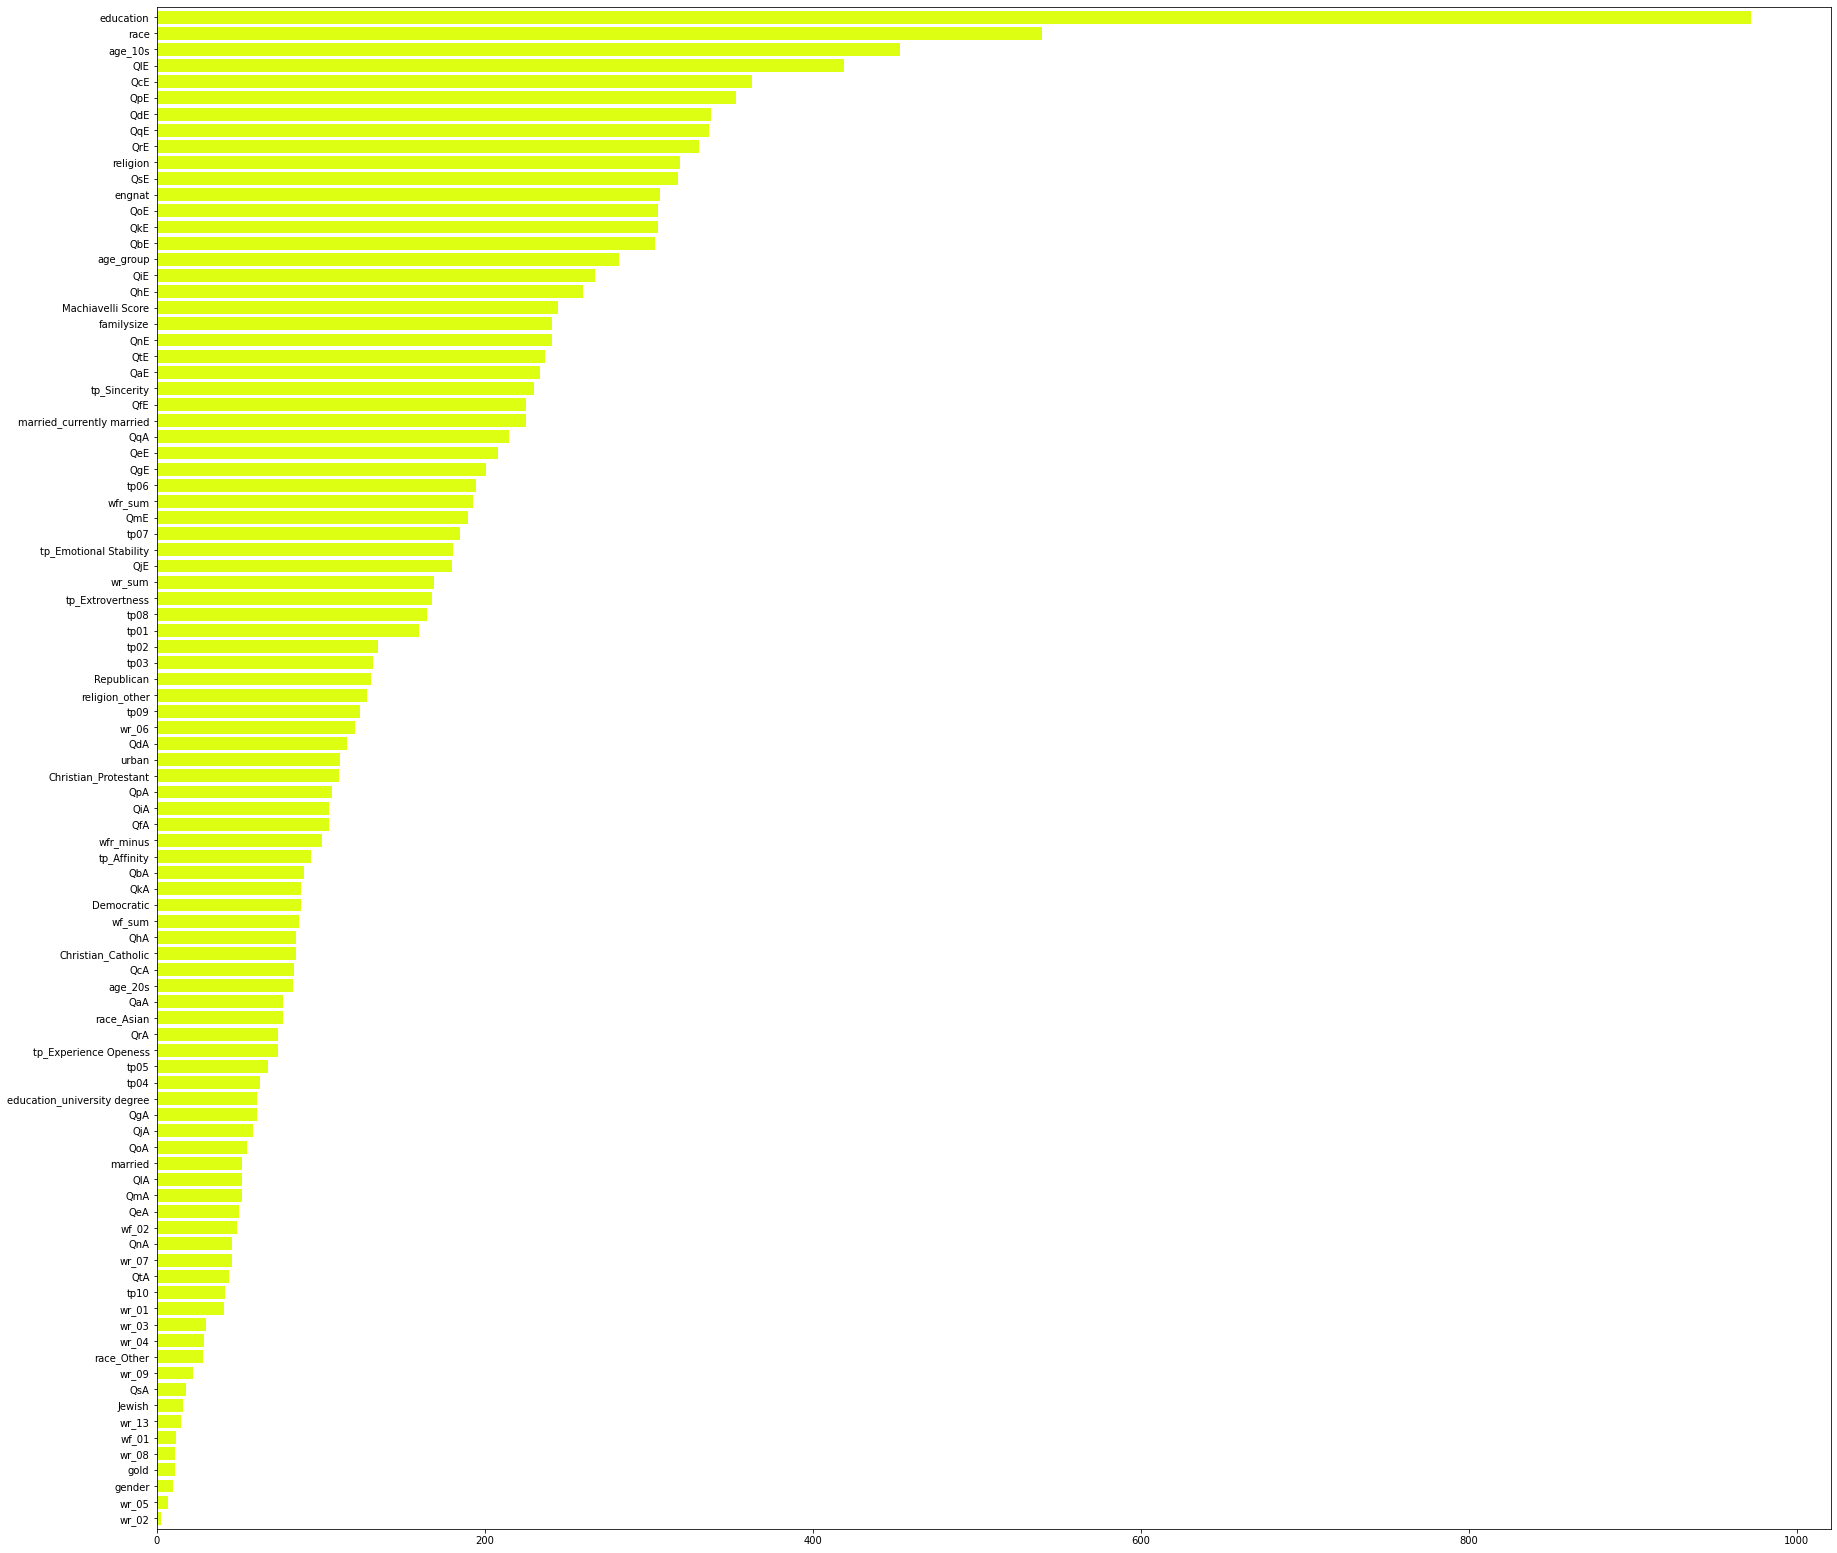

In [105]:
pd.Series(lgbm_wrapper_time.feature_importances_,X_new.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(30,28) # fig그림 크기 조절
plt.show()

In [106]:
evals = [(X_new, y)]

lgbm_wrapper = LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=500, random_state=1)
lgbm_wrapper.fit(X_new, y, eval_set=evals, eval_metric='logloss', verbose=True)

[1]	training's binary_logloss: 0.686545
[2]	training's binary_logloss: 0.684376
[3]	training's binary_logloss: 0.682249
[4]	training's binary_logloss: 0.680166
[5]	training's binary_logloss: 0.678119
[6]	training's binary_logloss: 0.67611
[7]	training's binary_logloss: 0.67414
[8]	training's binary_logloss: 0.672205
[9]	training's binary_logloss: 0.670307
[10]	training's binary_logloss: 0.668444
[11]	training's binary_logloss: 0.666615
[12]	training's binary_logloss: 0.664804
[13]	training's binary_logloss: 0.663043
[14]	training's binary_logloss: 0.661299
[15]	training's binary_logloss: 0.659599
[16]	training's binary_logloss: 0.657916
[17]	training's binary_logloss: 0.656261
[18]	training's binary_logloss: 0.654652
[19]	training's binary_logloss: 0.653056
[20]	training's binary_logloss: 0.651486
[21]	training's binary_logloss: 0.649959
[22]	training's binary_logloss: 0.648446
[23]	training's binary_logloss: 0.64696
[24]	training's binary_logloss: 0.645508
[25]	training's binary_loglo

[201]	training's binary_logloss: 0.554992
[202]	training's binary_logloss: 0.554838
[203]	training's binary_logloss: 0.554682
[204]	training's binary_logloss: 0.554538
[205]	training's binary_logloss: 0.554387
[206]	training's binary_logloss: 0.554236
[207]	training's binary_logloss: 0.554093
[208]	training's binary_logloss: 0.553947
[209]	training's binary_logloss: 0.553794
[210]	training's binary_logloss: 0.553644
[211]	training's binary_logloss: 0.553507
[212]	training's binary_logloss: 0.55336
[213]	training's binary_logloss: 0.553217
[214]	training's binary_logloss: 0.553069
[215]	training's binary_logloss: 0.552927
[216]	training's binary_logloss: 0.552794
[217]	training's binary_logloss: 0.55265
[218]	training's binary_logloss: 0.552514
[219]	training's binary_logloss: 0.552376
[220]	training's binary_logloss: 0.552241
[221]	training's binary_logloss: 0.552106
[222]	training's binary_logloss: 0.551973
[223]	training's binary_logloss: 0.55184
[224]	training's binary_logloss: 0.55

[403]	training's binary_logloss: 0.536261
[404]	training's binary_logloss: 0.536194
[405]	training's binary_logloss: 0.536127
[406]	training's binary_logloss: 0.536061
[407]	training's binary_logloss: 0.53599
[408]	training's binary_logloss: 0.535919
[409]	training's binary_logloss: 0.535849
[410]	training's binary_logloss: 0.535786
[411]	training's binary_logloss: 0.535721
[412]	training's binary_logloss: 0.535656
[413]	training's binary_logloss: 0.535584
[414]	training's binary_logloss: 0.535498
[415]	training's binary_logloss: 0.535434
[416]	training's binary_logloss: 0.535365
[417]	training's binary_logloss: 0.535304
[418]	training's binary_logloss: 0.535237
[419]	training's binary_logloss: 0.535178
[420]	training's binary_logloss: 0.535116
[421]	training's binary_logloss: 0.535045
[422]	training's binary_logloss: 0.534978
[423]	training's binary_logloss: 0.534915
[424]	training's binary_logloss: 0.534832
[425]	training's binary_logloss: 0.534752
[426]	training's binary_logloss: 0.

LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=500,
               random_state=1)

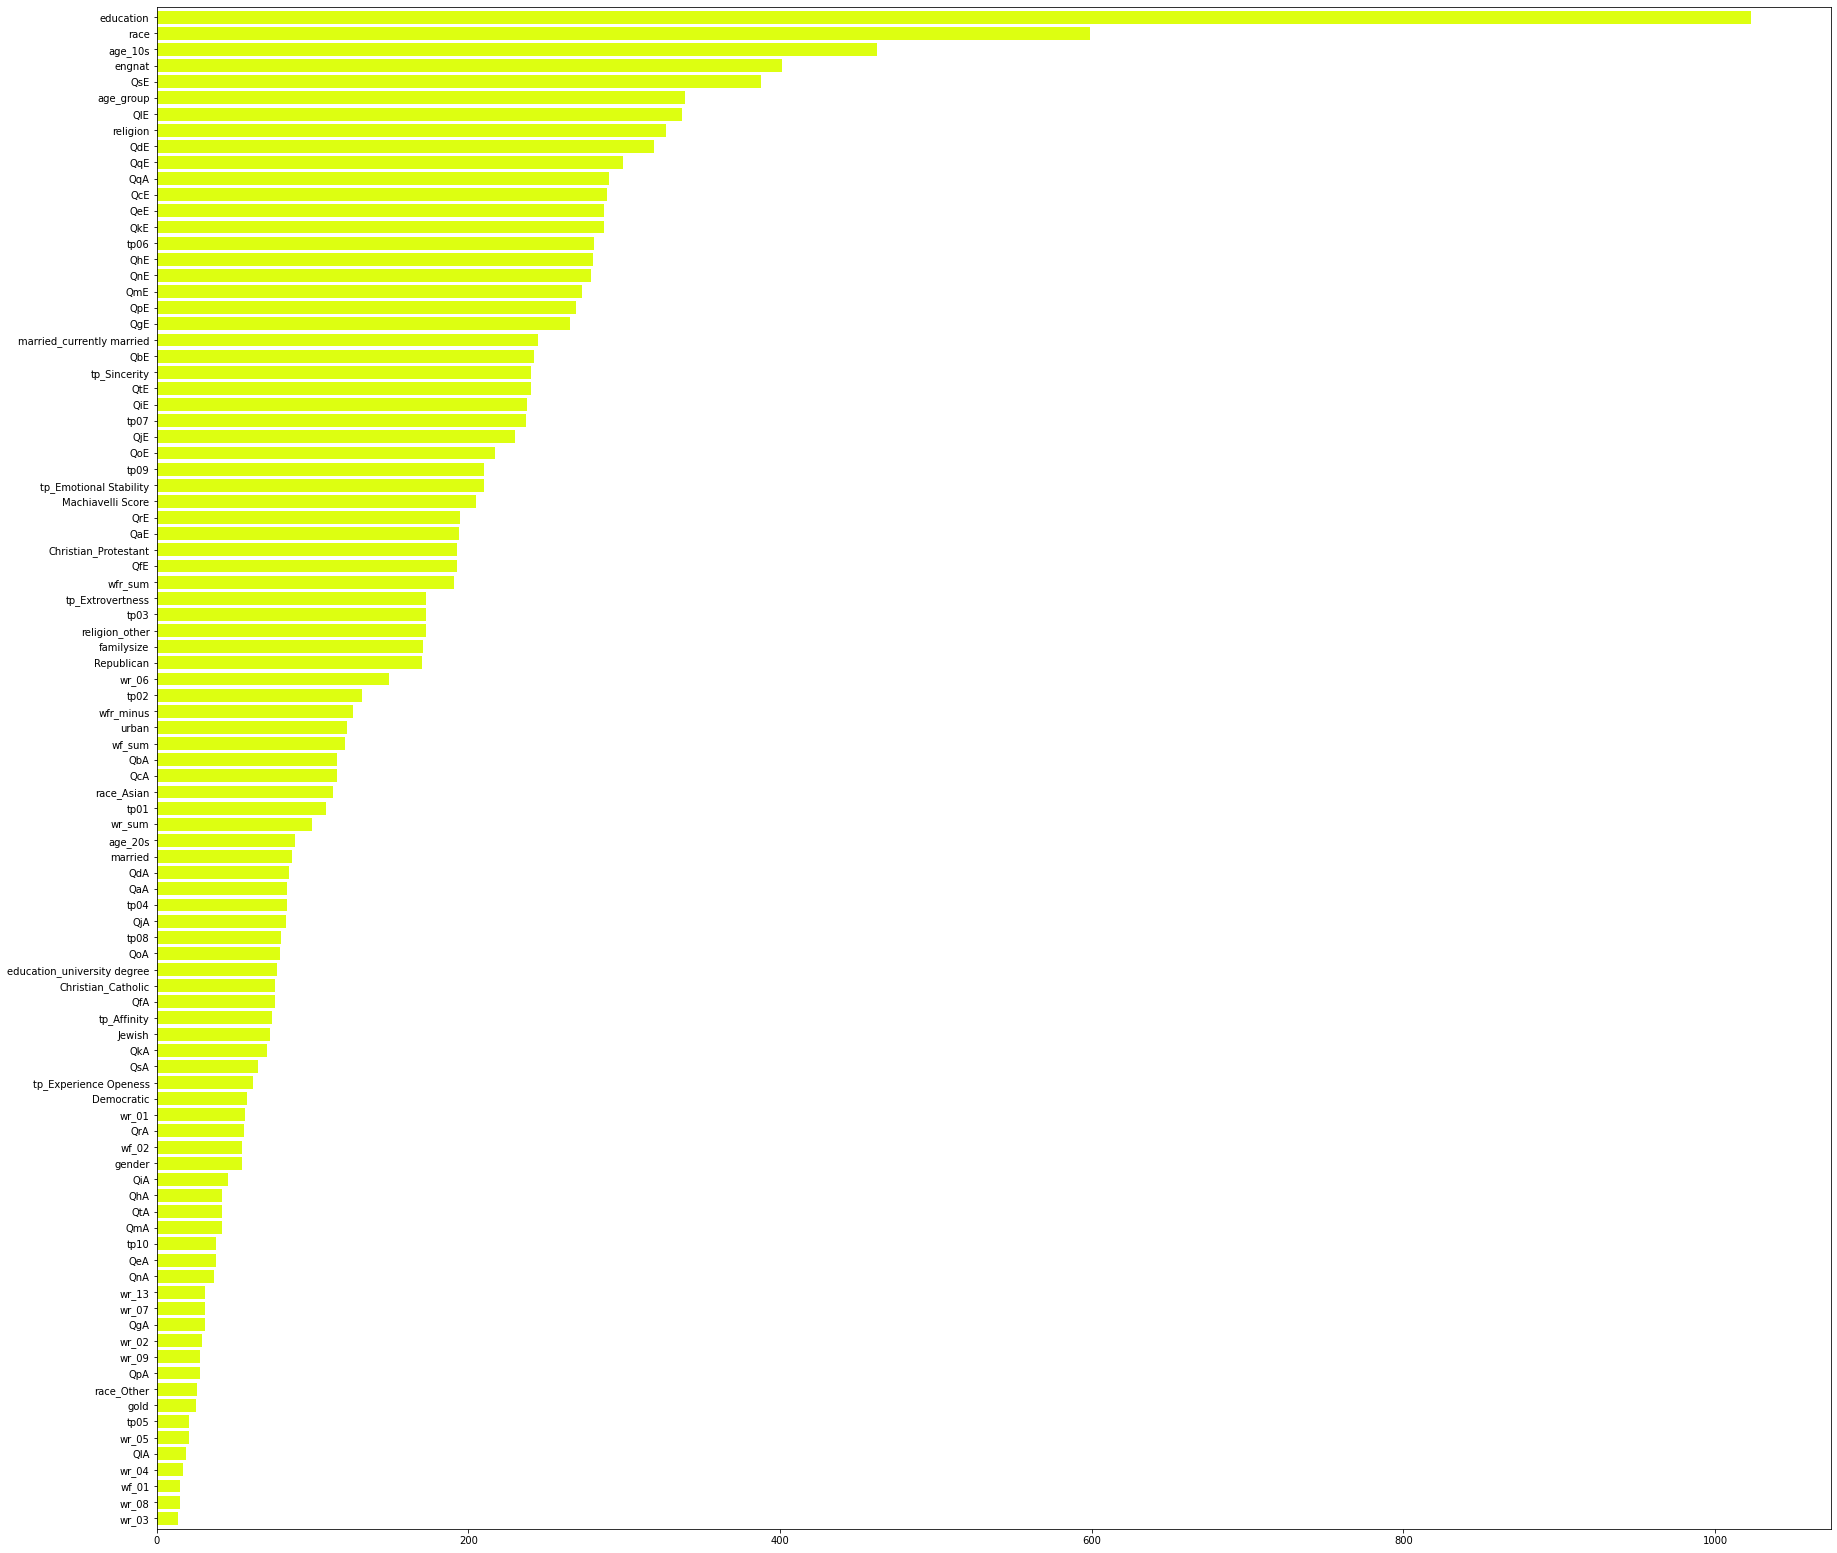

In [107]:
pd.Series(lgbm_wrapper.feature_importances_,X_new.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(30,28) # fig그림 크기 조절
plt.show()

In [109]:
pd.Series(lgbm_wrapper.feature_importances_,X_new.columns).sort_values(ascending=False)[:50]

education                    1023
race                          599
age_10s                       462
engnat                        401
QsE                           388
age_group                     339
QlE                           337
religion                      327
QdE                           319
QqE                           299
QqA                           290
QcE                           289
QeE                           287
QkE                           287
tp06                          281
QhE                           280
QnE                           279
QmE                           273
QpE                           269
QgE                           265
married_currently married     245
QbE                           242
tp_Sincerity                  240
QtE                           240
QiE                           238
tp07                          237
QjE                           230
QoE                           217
tp09                          210
tp_Emotional S

In [110]:
pd.Series(lgbm_wrapper.feature_importances_,X_new.columns).sort_values(ascending=True)[:50]

wr_03                           14
wr_08                           15
wf_01                           15
wr_04                           17
QlA                             19
wr_05                           21
tp05                            21
gold                            25
race_Other                      26
QpA                             28
wr_09                           28
wr_02                           29
QgA                             31
wr_07                           31
wr_13                           31
QnA                             37
QeA                             38
tp10                            38
QmA                             42
QtA                             42
QhA                             42
QiA                             46
gender                          55
wf_02                           55
QrA                             56
wr_01                           57
Democratic                      58
tp_Experience Openess           62
QsA                 

In [116]:
LGBM=pd.DataFrame(lgbm_wrapper.predict_proba(test_new))
LGBM['Probability']=LGBM[1]

In [117]:
submission['voted'] = LGBM['Probability']

In [119]:
submission.to_csv('submission_proba1110.csv', index = True)

In [118]:
submission

,voted
index,
0,0.590170
1,0.842947
2,0.471625
3,0.219624
4,0.712453
...,...
11378,0.460257
11379,0.875153
11380,0.235278
